In [1]:
# Import necesary libraries
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
stock_data = pd.read_csv('WIPRO.csv')

In [3]:
# Feature Engineering: Adding Moving Average
stock_data['MA_5'] = stock_data['Close'].rolling(window=5).mean()
stock_data.dropna(inplace=True)

In [4]:
# Select features and target
features = stock_data[['Open', 'High', 'Low', 'Volume', 'MA_5']]
target = stock_data['Close']

In [5]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [6]:
# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predictions
y_pred_test = model.predict(X_test)

In [9]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print(f'Test R-squared: {r2}')
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Test R-squared: 0.999211236289967
MAE: 2.092386620878583, MSE: 11.17894975001707, RMSE: 3.343493644381139


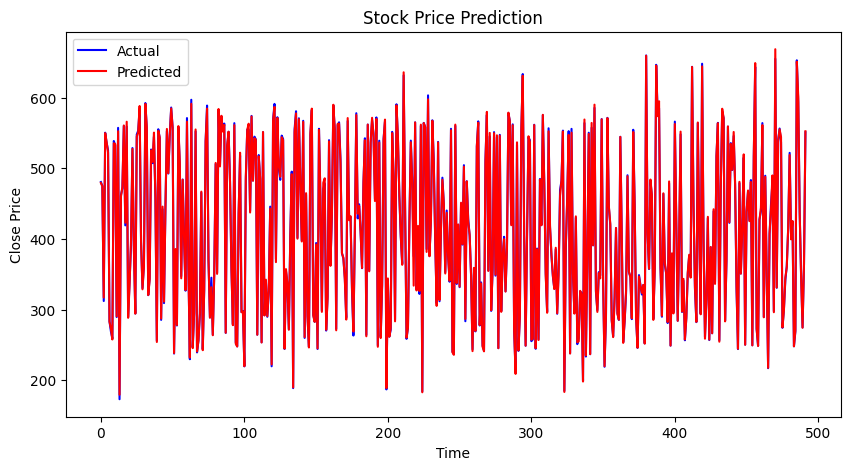

In [10]:
# Visualization
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_test, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

In [11]:
# Save model & scaler with .saw extension
joblib.dump(model, 'stock_model.saw')
joblib.dump(scaler, 'scaler.saw')

['scaler.saw']

In [12]:
# Load pre-trained model and scaler
model = joblib.load('stock_model.saw')
scaler = joblib.load('scaler.saw')

In [13]:
# Function to predict stock price for a new data point
def predict_stock_price(open_price, high_price, low_price, volume, ma_5):
    new_data = np.array([[open_price, high_price, low_price, volume, ma_5]])
    new_data_scaled = scaler.transform(new_data)
    predicted_price = model.predict(new_data_scaled)
    return predicted_price[0]

Reference Stock price inputs:
- open_price: 3750
- high_price: 3800
- low_price: 3700
- volume: 1500000
- ma_5: 3760

In [14]:
# Take user input for stock features
open_price = float(input("Enter Open Price: "))
high_price = float(input("Enter High Price: "))
low_price = float(input("Enter Low Price: "))
volume = float(input("Enter Volume: "))
ma_5 = float(input("Enter 5-day Moving Average: "))

Enter Open Price:  3750
Enter High Price:  3800
Enter Low Price:  3700
Enter Volume:  1500000
Enter 5-day Moving Average:  3760


In [20]:
# Predict stock price
predicted_price = predict_stock_price(open_price, high_price, low_price, volume, ma_5)
print(f'Predicted Closing Price: {predicted_price}')

Predicted Closing Price: 3753.7377443155065


In [21]:
# Predefined stock price inputs
stock_inputs = [
    {'open_price': 3750, 'high_price': 3800, 'low_price': 3700, 'volume': 1500000, 'ma_5': 3760},
    {'open_price': 3600, 'high_price': 3650, 'low_price': 3550, 'volume': 1200000, 'ma_5': 3620}
]

actual_prices = [3780, 3635]  # Example actual closing prices for comparison
predicted_prices = []

# Predict stock prices for predefined inputs
for i, stock in enumerate(stock_inputs):
    predicted_price = predict_stock_price(stock['open_price'], stock['high_price'], stock['low_price'], stock['volume'], stock['ma_5'])
    predicted_prices.append(predicted_price)
    print(f"Prediction {i+1}: Open={stock['open_price']}, High={stock['high_price']}, Low={stock['low_price']}, Volume={stock['volume']}, MA_5={stock['ma_5']} -> Predicted Close={predicted_price}")

Prediction 1: Open=3750, High=3800, Low=3700, Volume=1500000, MA_5=3760 -> Predicted Close=3753.7377443155065
Prediction 2: Open=3600, High=3650, Low=3550, Volume=1200000, MA_5=3620 -> Predicted Close=3604.3043256410338


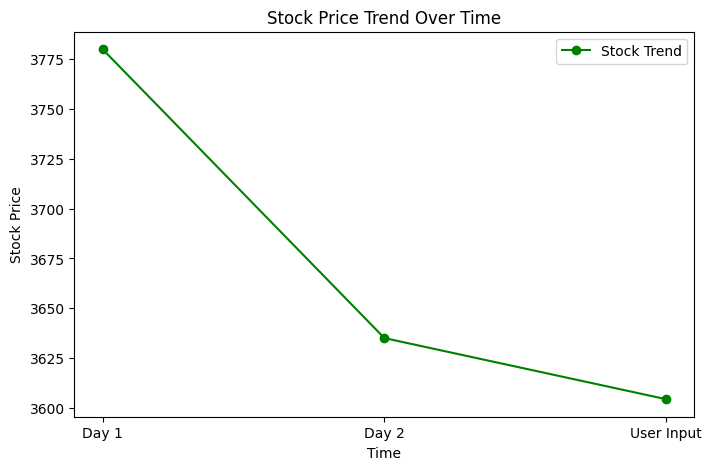

In [22]:
# Line plot: Stock Trend
dates = ['Day 1', 'Day 2', 'User Input']
trend_prices = actual_prices + [predicted_price]
plt.figure(figsize=(8,5))
plt.plot(dates, trend_prices, marker='o', linestyle='-', color='green', label='Stock Trend')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Trend Over Time')
plt.legend()
plt.show()